# Hot Cities in Tulsa County for Establishing New Pizza Restaurant

# Matthew Bamidele
# IBM Data Science Capstone Project
# May 27,2020



In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


In [2]:
CLIENT_ID = 'MYKTZCJP343CQWLACYJBFIE5TSDU4J40YS4JK3NJXBWMMMZ4' # your Foursquare ID
CLIENT_SECRET = 'YZNZ0PXOZ52JQIKG5SGSDMPX3KVT0EUN5YLTAHC2O3Q4XCJY' # your Foursquare Secret
VERSION = '20200604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)

Your credentails:
CLIENT_ID: MYKTZCJP343CQWLACYJBFIE5TSDU4J40YS4JK3NJXBWMMMZ4


In [3]:
# type your answer here
LIMIT = 500 # Maximum is 100
cities = ["Broken Arrow, OK", 'Bixby, OK', 'Catoosa, OK', 'Claremore, OK', 'Collinsville, OK','Coweta, OK','Glenpool, OK','Jenks, OK','Owasso,OK','Sand Springs, OK','Sapulpa, OK','Skiatook, OK','Turley, OK','Tulsa, OK']
results = {}
for city in cities:
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&limit={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        city,
        LIMIT,
        "4bf58dd8d48988d1ca941735") # PIZZA PLACE CATEGORY ID
    results[city] = requests.get(url).json()

In [4]:
df={}
for city in cities:
    venues = json_normalize(results[city]['response']['groups'][0]['items'])
    df[city] = venues[['venue.name', 'venue.location.address', 'venue.location.lat', 'venue.location.lng']]
    df[city].columns = ['Name', 'Address', 'Lat', 'Lng']

Foursquare API will give the nearest 100 venues in a city. 

In [6]:
maps = {}
for city in cities:
    city_lat = np.mean([results[city]['response']['geocode']['geometry']['bounds']['ne']['lat'],
                        results[city]['response']['geocode']['geometry']['bounds']['sw']['lat']])
    city_lng = np.mean([results[city]['response']['geocode']['geometry']['bounds']['ne']['lng'],
                        results[city]['response']['geocode']['geometry']['bounds']['sw']['lng']])
    maps[city] = folium.Map(location=[city_lat, city_lng], zoom_start=11)

    # add markers to map
    for lat, lng, label in zip(df[city]['Lat'], df[city]['Lng'], df[city]['Name']):
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(maps[city])  
    print(f"Total number of pizza places in {city} = ", results[city]['response']['totalResults'])
    print("Showing Top 100")

Total number of pizza places in Broken Arrow, OK =  50
Showing Top 100
Total number of pizza places in Bixby, OK =  92
Showing Top 100
Total number of pizza places in Catoosa, OK =  59
Showing Top 100
Total number of pizza places in Claremore, OK =  59
Showing Top 100
Total number of pizza places in Collinsville, OK =  51
Showing Top 100
Total number of pizza places in Coweta, OK =  49
Showing Top 100
Total number of pizza places in Glenpool, OK =  75
Showing Top 100
Total number of pizza places in Jenks, OK =  93
Showing Top 100
Total number of pizza places in Owasso,OK =  46
Showing Top 100
Total number of pizza places in Sand Springs, OK =  96
Showing Top 100
Total number of pizza places in Sapulpa, OK =  90
Showing Top 100
Total number of pizza places in Skiatook, OK =  66
Showing Top 100
Total number of pizza places in Turley, OK =  78
Showing Top 100
Total number of pizza places in Tulsa, OK =  103
Showing Top 100


In [25]:
data_table={'city':['Broken Arrow','Bixby','Catoosa','Claremore','Collinsville','Coweta','Glenpool','Jenks','Owasso','Sand Springs','Sapulpa','Skiatook','Turley','Tulsa'],'Total pizza spot':['50','92','59','59','51','49','75','93','46','96','90','66','78','103']}

In [27]:
df_table = pd.DataFrame(data_table)
df_table

,city,Total pizza spot
0,Broken Arrow,50
1,Bixby,92
2,Catoosa,59
3,Claremore,59
4,Collinsville,51
5,Coweta,49
6,Glenpool,75
7,Jenks,93
8,Owasso,46
9,Sand Springs,96


In [44]:
import matplotlib.pyplot as plt

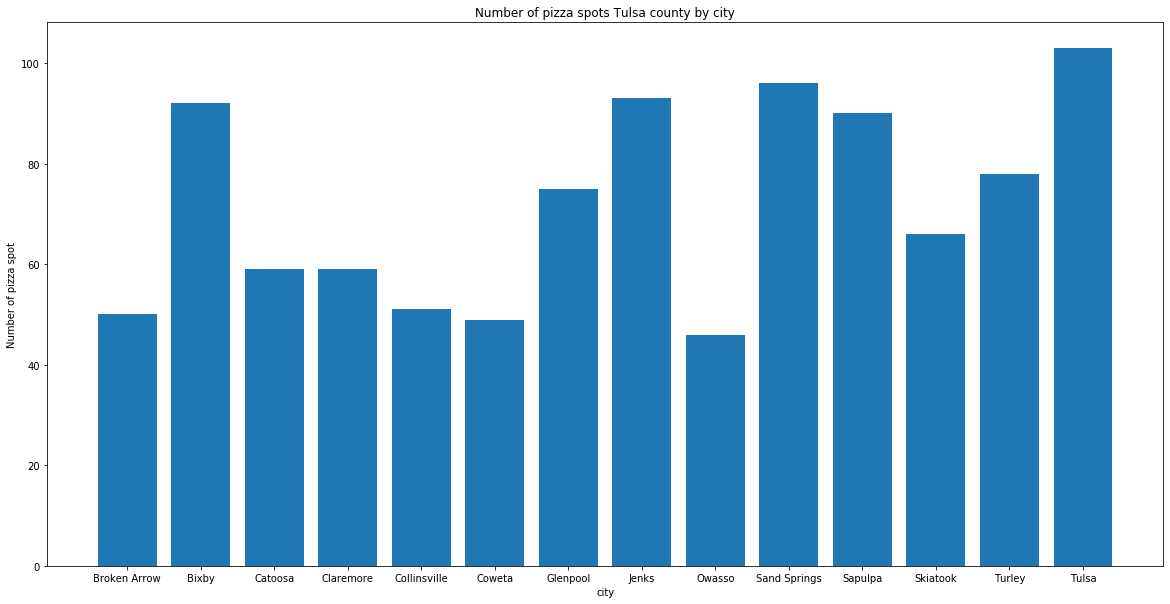

In [49]:
City = ['Broken Arrow','Bixby','Catoosa','Claremore','Collinsville','Coweta','Glenpool','Jenks','Owasso','Sand Springs','Sapulpa','Skiatook','Turley','Tulsa']
Total_pizza_spot = [50,92,59,59,51,49,75,93,46,96,90,66,78,103]
plt.figure(figsize=(20, 10))
plt.bar(City, Total_pizza_spot)
plt.title('Number of pizza spots Tulsa county by city')
plt.xlabel('city')
plt.ylabel('Number of pizza spot')
plt.show()

In [11]:
%%bash
pip install geopy==0.95.1

  Created wheel for geopy: filename=geopy-0.95.1-cp37-none-any.whl size=43315 sha256=429c5ae3b37ef96bd6884a1f1e8958cf33e8a3ae4c512e3617b7235a37d45631
  Stored in directory: /Users/matthewbamidele/Library/Caches/pip/wheels/fd/e9/d6/35d1a7870a17ae990425150058c21f5998808f11448ebff857
Successfully built geopy


In [15]:
conda install -c conda-forge geopy 

Solving environment: done

## Package Plan ##

  environment location: /Users/matthewbamidele/opt/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0
  python_abi         conda-forge/osx-64::python_abi-3.7-1_cp37m

The following package

In [18]:
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests

ImportError: cannot import name 'Nominatim' from 'geopy.geocoders' (/Users/matthewbamidele/opt/anaconda3/lib/python3.7/site-packages/geopy/geocoders/__init__.py)

# It is clear that Tulsa, Sand Springs, Jenks and Bixby have most number of pizza spots in Tulsa county 

Statistics will be used get the mean location of the pizza spot to determined if the cities that top the list are actually dense in pizza spots or not
Next I will take the average of the distance

In [29]:

maps = {}
for city in cities:
    city_lat = np.mean([results[city]['response']['geocode']['geometry']['bounds']['ne']['lat'],
                        results[city]['response']['geocode']['geometry']['bounds']['sw']['lat']])
    city_lng = np.mean([results[city]['response']['geocode']['geometry']['bounds']['ne']['lng'],
                        results[city]['response']['geocode']['geometry']['bounds']['sw']['lng']])
    maps[city] = folium.Map(location=[city_lat, city_lng], zoom_start=11)
    venues_mean_coor = [df[city]['Lat'].mean(), df[city]['Lng'].mean()] 
    # add markers to map
    for lat, lng, label in zip(df[city]['Lat'], df[city]['Lng'], df[city]['Name']):
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(maps[city])
        folium.PolyLine([venues_mean_coor, [lat, lng]], color="green", weight=1.5, opacity=0.5).add_to(maps[city])
    
    label = folium.Popup("Mean Co-ordinate", parse_html=True)
    folium.CircleMarker(
        venues_mean_coor,
        radius=10,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(maps[city])

    print(city)
    print("Mean Distance from Mean coordinates")
    print(np.mean(np.apply_along_axis(lambda x: np.linalg.norm(x - venues_mean_coor),1,df[city][['Lat','Lng']].values)))

Broken Arrow, OK
Mean Distance from Mean coordinates
0.08733299891156909
Bixby, OK
Mean Distance from Mean coordinates
0.09839337438925452
Catoosa, OK
Mean Distance from Mean coordinates
0.25228400069372814
Claremore, OK
Mean Distance from Mean coordinates
0.16067866417436527
Collinsville, OK
Mean Distance from Mean coordinates
0.07235974584340109
Coweta, OK
Mean Distance from Mean coordinates
0.371403005179296
Glenpool, OK
Mean Distance from Mean coordinates
0.06922962877863599
Jenks, OK
Mean Distance from Mean coordinates
0.0741682772168418
Owasso,OK
Mean Distance from Mean coordinates
0.012783102047853398
Sand Springs, OK
Mean Distance from Mean coordinates
0.09940114028206581
Sapulpa, OK
Mean Distance from Mean coordinates
0.09295076697665372
Skiatook, OK
Mean Distance from Mean coordinates
0.13541795037280457
Turley, OK
Mean Distance from Mean coordinates
0.0931281408188858
Tulsa, OK
Mean Distance from Mean coordinates
0.0634125254239628


In [30]:
mean_dist =['0.08733299891156909','0.09839337438925452','0.25228400069372814','0.16067866417436527','0.07235974584340109','0.371403005179296','0.06922962877863599','0.0741682772168418','0.012783102047853398','0.09940114028206581','0.09295076697665372','0.13541795037280457','0.0931281408188858','0.0634125254239628']
df_table['Mean distance'] = mean_dist
df_table

,city,Total pizza spot,Mean distance
0,Broken Arrow,50,0.08733299891156909
1,Bixby,92,0.09839337438925452
2,Catoosa,59,0.25228400069372814
3,Claremore,59,0.16067866417436527
4,Collinsville,51,0.07235974584340109
5,Coweta,49,0.371403005179296
6,Glenpool,75,0.06922962877863599
7,Jenks,93,0.0741682772168418
8,Owasso,46,0.012783102047853398
9,Sand Springs,96,0.09940114028206581


In [31]:
sort_df_table = df_table.sort_values('Mean distance')
sort_df_table

,city,Total pizza spot,Mean distance
8,Owasso,46,0.012783102047853398
13,Tulsa,103,0.0634125254239628
6,Glenpool,75,0.06922962877863599
4,Collinsville,51,0.07235974584340109
7,Jenks,93,0.0741682772168418
0,Broken Arrow,50,0.08733299891156909
10,Sapulpa,90,0.09295076697665372
12,Turley,78,0.0931281408188858
1,Bixby,92,0.09839337438925452
9,Sand Springs,96,0.09940114028206581


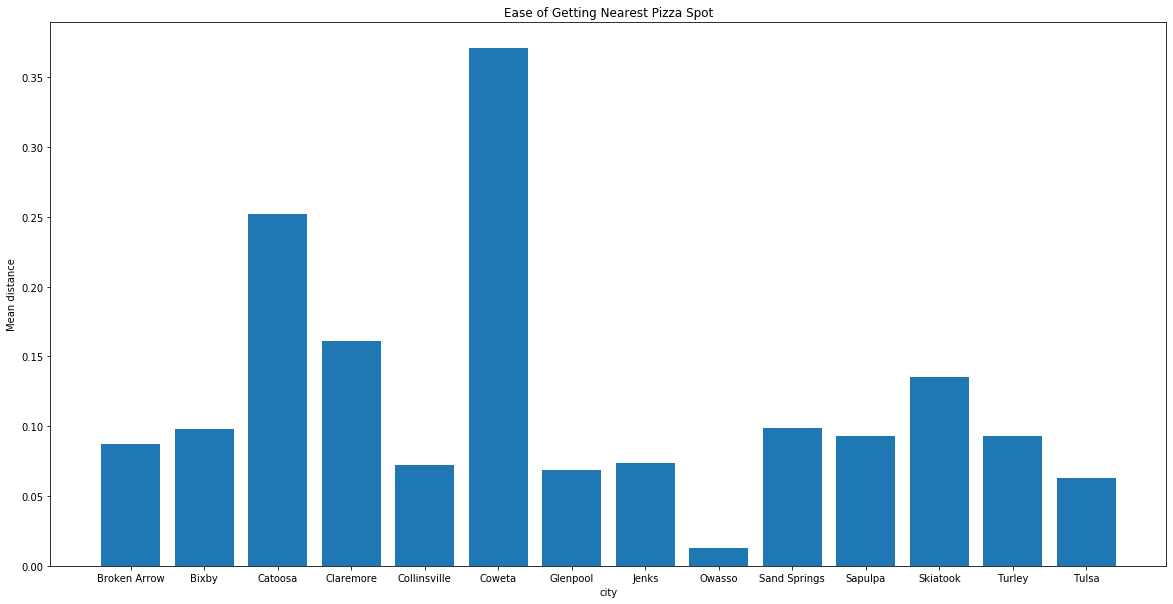

In [52]:
City = ['Broken Arrow','Bixby','Catoosa','Claremore','Collinsville','Coweta','Glenpool','Jenks','Owasso','Sand Springs','Sapulpa','Skiatook','Turley','Tulsa']
mean_dist =[0.087,0.098,0.252,0.161,0.072,0.371,0.069,0.074,0.013,0.099,0.093,0.135,0.093,0.063]
plt.figure(figsize=(20, 10))
plt.bar(City, mean_dist)
plt.title('Ease of Getting Nearest Pizza Spot')
plt.xlabel('city')
plt.ylabel('Mean distance')
plt.show()

# The cities with the very low mean distance are Owasso, Tulsa, Glenpool, Jenks. It is very much easy for residents in these cities to get a nearest pizza spot. Should an enterpreneaur establish more pizza spots in these cities or in cities with high mean distance to pizza spot? Comparison of population of thes cities will be in making right decision for an enterpreneuar. 

In [60]:
# Getting data on population of cities in Tulsa county from https://statisticalatlas.com/metro-area/Oklahoma/Tulsa/Population
population =[104.87,23.96,7.49,19.00,6.29,9.57,12.35,19.85,33.60,19.51,20.55,7.96,2.53,399.91]
df_table['Population in 1000'] = population
df_table

,city,Total pizza spot,Mean distance,Population in 1000
0,Broken Arrow,50,0.08733299891156909,104.87
1,Bixby,92,0.09839337438925452,23.96
2,Catoosa,59,0.25228400069372814,7.49
3,Claremore,59,0.16067866417436527,19.00
4,Collinsville,51,0.07235974584340109,6.29
5,Coweta,49,0.371403005179296,9.57
6,Glenpool,75,0.06922962877863599,12.35
7,Jenks,93,0.0741682772168418,19.85
8,Owasso,46,0.012783102047853398,33.60
9,Sand Springs,96,0.09940114028206581,19.51


In [67]:
sort_df_table_2 = df_table.sort_values('Population in 1000')
sort_df_table_2

,city,Total pizza spot,Mean distance,Population in 1000
12,Turley,78,0.0931281408188858,2.53
4,Collinsville,51,0.07235974584340109,6.29
2,Catoosa,59,0.25228400069372814,7.49
11,Skiatook,66,0.13541795037280457,7.96
5,Coweta,49,0.371403005179296,9.57
6,Glenpool,75,0.06922962877863599,12.35
3,Claremore,59,0.16067866417436527,19.00
9,Sand Springs,96,0.09940114028206581,19.51
7,Jenks,93,0.0741682772168418,19.85
10,Sapulpa,90,0.09295076697665372,20.55


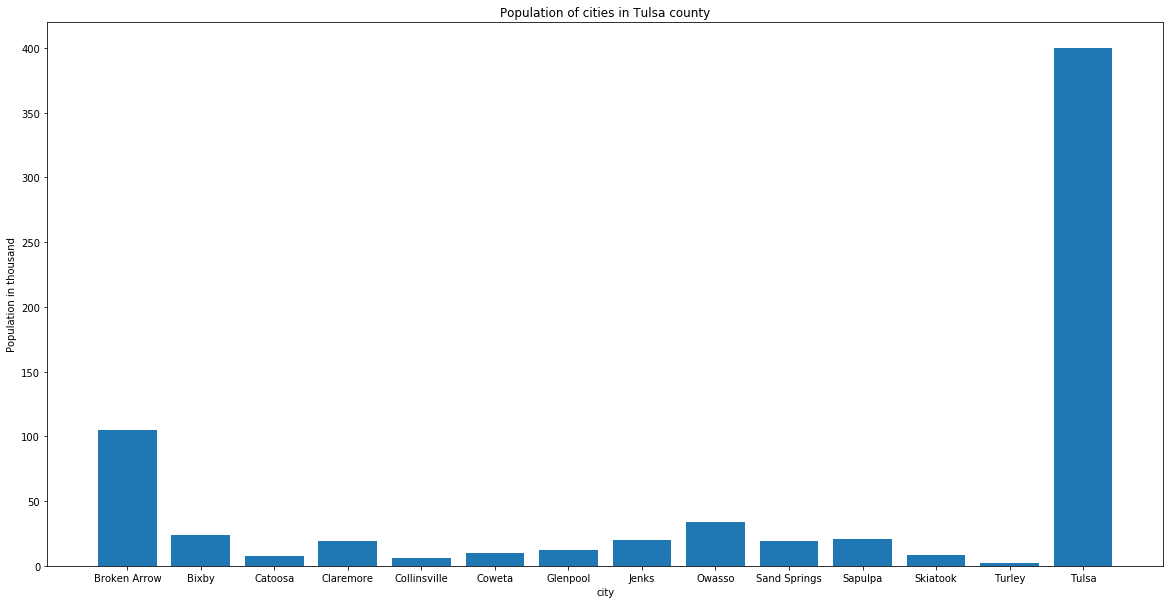

In [55]:
# 
City = ['Broken Arrow','Bixby','Catoosa','Claremore','Collinsville','Coweta','Glenpool','Jenks','Owasso','Sand Springs','Sapulpa','Skiatook','Turley','Tulsa']
population =[104.87,23.96,7.49,19.00,6.29,9.57,12.35,19.85,33.60,19.51,20.55,7.96,2.53,399.91]
plt.figure(figsize=(20, 10))
plt.bar(City, population)
plt.title('Population of cities in Tulsa county')
plt.xlabel('city')
plt.ylabel('Population in thousand')
plt.show()

# Cities of Tulsa, Broken Arrow, Owasso and Bixby have high population. These cities, especially Tulsa should be considered by an enterpreneur who want to establish a pizza restaurants in Tulsa county.